# UTS Kelompok Krawu - Decision Tree Classifier

Arief Saferman
\
**Kevin Darmawan**
\
Ramadhan Kalih Sewu
\
Yogie Wisesa

### Metodologi Percobaan
- Pada notebook ini akan dilakukan percobaan klasifikasi menggunakan algoritma Decision Tree Classifier
- Rasio training dan test data pada percobaan ini adalah 50/50
- Percobaan dilakukan sebanyak empat kali untuk tiga variasi hyperparameter berbeda dan hyperparameter default
- Hasil percobaan divalidasi dengan menukar data training dan data testing dan membandingkan akurasinya.

1) Bagian 1

    a. Default Hyperparameter Decision Tree
    
    b. Tuning menggunakan Gridsearch Cross Validation
    
    c. Tuning menggunakan Randomizedsearch Cross Validation
    
    d. Tuning hyperparameter secara manual
    
2) Bagian 2 - Validasi dengan menukar data testing dan training

    a. Default Hyperparameter Decision Tree
    
    b. Menggunakan Gridsearch Cross Validation dari bagian 1
    
    c. Tuning menggunakan Randomizedsearch Cross Validation
    
    d. Tuning hyperparameter secara manual

Dataset yang digunakan adalah data jenis biji gandum

- Source : 
- Total data : 200
- Jumlah kelas : 3
- Data per kelas : 66-68-65

### 1. Mengimpor dataset dan libraries yang akan digunakan

In [1]:
# mengimport data dari seeds csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import style

# mengggunakan style grayscale untuk keseluruhan output bagan dan grafik
plt.style.use('grayscale')

data = pd.read_csv('seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Splitting dataset

Splitting yang digunakan adalah 50 / 50 dilakukan menggunakan train test split dari scikit learn library

In [2]:
#split data training sesuai requirement
from sklearn.model_selection import train_test_split

# X adalah features dari data
# y adalah label dari data
X = data[['Area', 'Perimeter', 'Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove']]
y = data[['Type']]

# splitting menggunakan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# inisiasi decision tree classifier untuk digunakan cross validator
clf = DecisionTreeClassifier()

## Bagian 1

### Default hyperparameters
Percobaan pertama menggunakan hyperparameter default dari decision tree classifier untuk menjadi acuan akurasi data

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

In [3]:
# Create Decision Tree classifer object
tree_1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_1.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_1 = tree_1.predict(X_test)

# Calculate accuracy scores
from sklearn.metrics import accuracy_score
acc1a = accuracy_score(y_true = y_test, y_pred = y_pred_1)
print('Validasi training data dengan default hyperparameter (harus return 1) : ', accuracy_score(y_true = y_train, y_pred = tree_1.predict(X_train)))
print('Accuracy score test data dengan default hyperparameter : ', acc1a)

Validasi training data dengan default hyperparameter (harus return 1) :  1.0
Accuracy score test data dengan default hyperparameter :  0.92


Confusion matrix, without normalization
[[26  1  2]
 [ 2 37  0]
 [ 3  0 29]]
Normalized confusion matrix
[[0.89655172 0.03448276 0.06896552]
 [0.05128205 0.94871795 0.        ]
 [0.09375    0.         0.90625   ]]


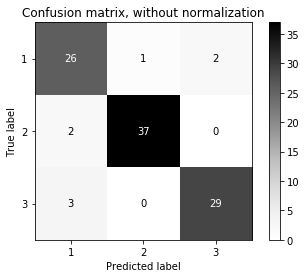

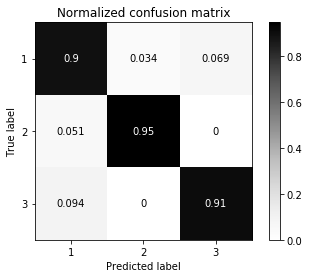

In [4]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix1a = plot_confusion_matrix(tree_1, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix1a.ax_.set_title(title)

    print(title)
    print(matrix1a.confusion_matrix)

plt.show()

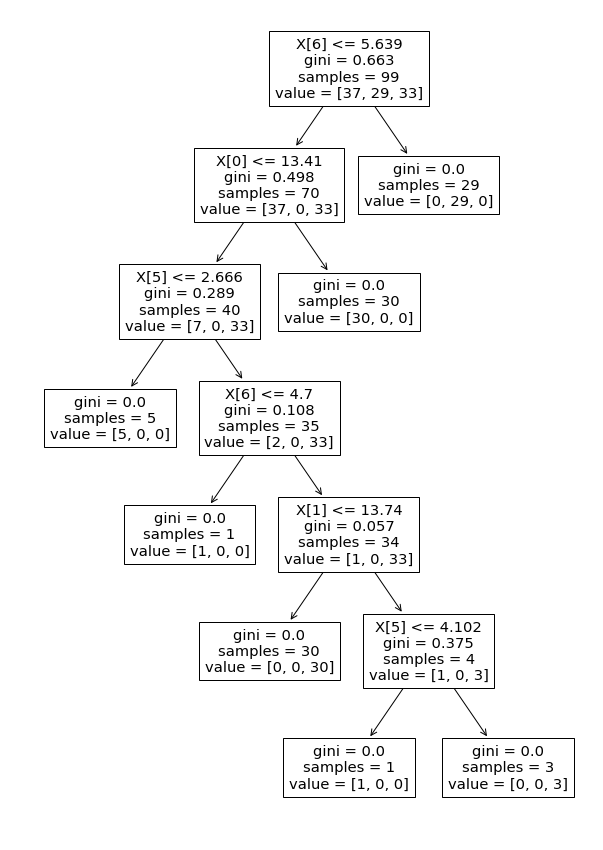

In [5]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_1)

### Parameters for hyperparameter tuning
Di bagian ini, untuk melakukan variasi *hyperparameter* digunakan cross validator untuk mendapatkan *hyperparameter* terbaik yang akan menghasilkan skor tertinggi. Berikut adalah list berisi nilai yang akan diujikan untuk *cross validation*. Alasan dipilih *hyperparameter* berikut adalah :

- **criterion** : 'gini' dan 'entropy' menentukan impurity data, sangat berpengaruh ke pengambilan keputusan splitting tree
- **min sample split** : menentukan jumlah sample minimum yang dibutuhkan untuk mensplit node
- **max depth** : menentukan seberpapa detail 'pertanyaan' decision tree sebelum memutuskan, diberi None untuk memungkinkan setelah *root* langsung *leaf*
- **min samples leaf** : jumlah sampel data minimum untuk dapat dijadikan sebuah *leaf*
- **max leaf nodes** : batas *leaf* (tebakan akhir) terbanyak *decision tree*, diberi None untuk memungkinkan pengambilan keputusan langsung

ref https://www.linkedin.com/pulse/what-gridsearchcv-randomizedsearchcv-differences-between-cheruku

### Tuning with GridSearchCV
Gridsearch akan menggunakan set parameter yang telah di inisialisasi sebelumnya untuk menentukan kombinasi hyperparameter terbaik berdasarkan cross validation score tertinggi.

In [6]:
# Gridsearch hyperparameter crossvalidation set
criteria = ["gini", "entropy"]               #criteria to be tested
min_sample_split_range = [2,10, 20]          #min sample split to be tested
max_depth_range = [None, 2, 5, 10]           #max depth to be tested
min_samples_leaf_range = [1, 5, 10]          #min samples in the leaf to be tested
max_leaf_nodes_range = [None, 5, 10, 20]     #min leaf nodes to be tested

In [7]:
# https://www.kaggle.com/aceccon/6-iris-dataset-learning-to-tuning-parameters

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": max_leaf_nodes_range
            }

In [8]:
grid = GridSearchCV(clf,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    refit=True,
                    return_train_score=True)

tree_model2 = make_pipeline(preprocessing.StandardScaler(), grid)  

y_2 = tree_model2.fit(X_train, y_train)

acc1b = grid.best_score_

g1 = grid.best_params_

# Create decision tree model with best hyperparameters
tree_2 = DecisionTreeClassifier(criterion=g1['criterion'], 
                                 max_depth=g1['max_depth'], 
                                 max_leaf_nodes=g1['max_leaf_nodes'], 
                                 min_samples_leaf=g1['min_samples_leaf'], 
                                 min_samples_split=g1['min_samples_split']
                                )

# Train Decision Tree Classifer
tree_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_2 = tree_2.predict(X_test)

print("Accuracy tuned model GridSearchCV: %.4f" %acc1b)

print(grid.best_params_)

Accuracy tuned model GridSearchCV: 0.9600
{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [9]:
# print(y_pred_2.cv_results_['mean_test_score'])

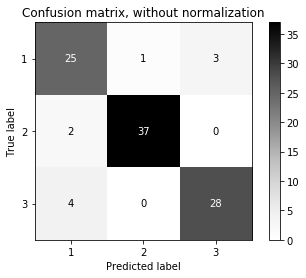

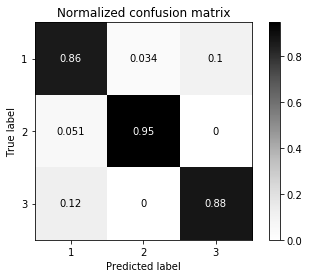

In [10]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix1b = plot_confusion_matrix(tree_model2, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix1b.ax_.set_title(title)

plt.show()

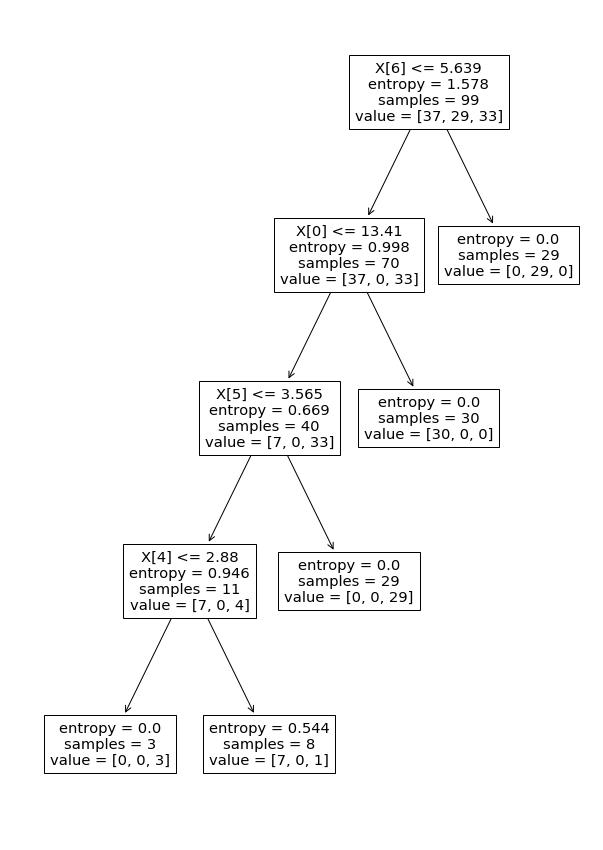

In [11]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_2)

### Tuning with Randomizedsearch CV
Randomized search CV akan mencari kombinasi hyperparameter terbaik berdasarkan range nilai random yang dituliskan berikut, dan akan memilih pasangan hyperparameter secara komputasi random. 

In [12]:
from scipy.stats import randint

#Randomizedsearch CV random number ranges
criteria = ["gini", "entropy"]                 #criteria to be tested 
min_sample_split_range = randint(2,20)         #min sample split to be tested
max_depth_range = [None, 2, 5, 10]             #max depth to be tested
min_samples_leaf_range = randint(2,10)        #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10 , 20]     #min leaf nodes to be tested

In [13]:
# https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=11
# https://github.com/wblakecannon/DataCamp/blob/master/17-supervised-learning-with-scikit-learn/03-fine-tuning-your-model/06-hyperparameter-tuning-with-randomizedsearchcv.py

from sklearn.model_selection import RandomizedSearchCV

param_rnd = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": max_leaf_nodes_range
              }

In [14]:
rnd = RandomizedSearchCV(clf,
                    param_distributions=param_rnd,
                    cv=5,
                    scoring='accuracy',
                    refit=True,
                    return_train_score=True)

tree_model3 = make_pipeline(preprocessing.StandardScaler(), rnd)  

tree_model3.fit(X_train, y_train)

acc1c = rnd.best_score_

d1 = rnd.best_params_

# Create decision tree model with best hyperparameters
tree_3 = DecisionTreeClassifier(criterion=d1['criterion'], 
                                 max_depth=d1['max_depth'], 
                                 max_leaf_nodes=d1['max_leaf_nodes'], 
                                 min_samples_leaf=d1['min_samples_leaf'], 
                                 min_samples_split=d1['min_samples_split']
                                )

# Train Decision Tree Classifer
tree_3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_3 = tree_3.predict(X_test)

print("Accuracy tuning model RandomizedSearchCV: %.4f" %acc1c)
print(rnd.best_params_)

Accuracy tuning model RandomizedSearchCV: 0.9600
{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


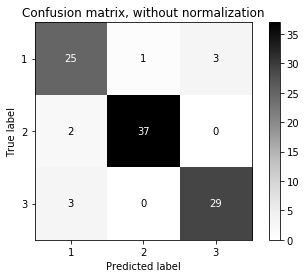

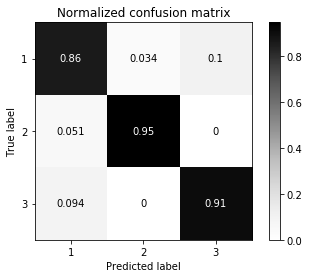

In [15]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix1c = plot_confusion_matrix(tree_model3, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix1c.ax_.set_title(title)

plt.show()

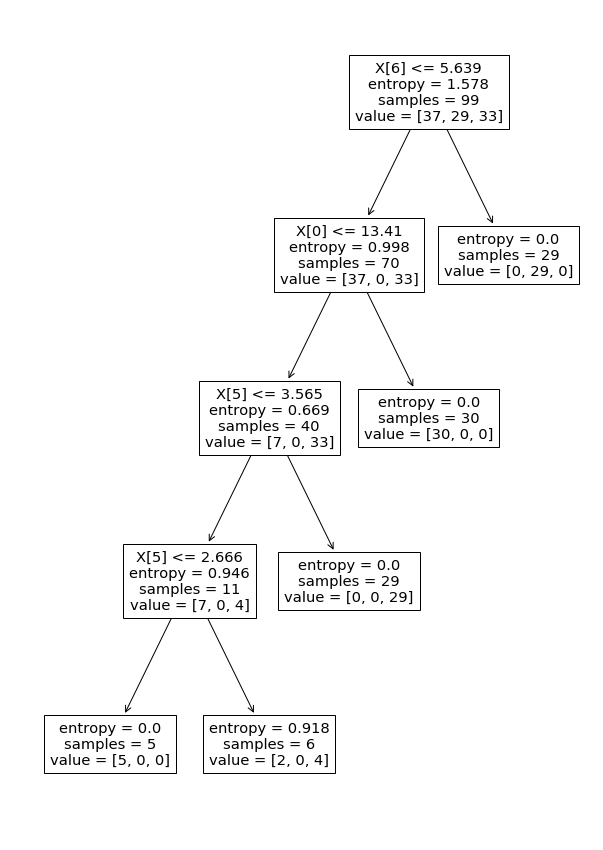

In [16]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_3)

### Manual Hyperparameter

In [17]:
# Create Decision Tree classifer object
tree_4 = DecisionTreeClassifier( criterion='entropy', 
                                 max_depth=5, 
                                 max_leaf_nodes=10, 
                                 min_samples_leaf=2, 
                                 min_samples_split=5,
                                 max_features=4
                               )

# Train Decision Tree Classifer
tree_4.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_4 = tree_4.predict(X_test)

acc1d = accuracy_score(y_true = y_test, y_pred = y_pred_4)
print('Accuracy score test data dengan manual Hyperparameter : ', acc1d)
print("{criterion='entropy', max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, max_features=4}")

Accuracy score test data dengan manual Hyperparameter :  0.87
{criterion='entropy', max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, max_features=4}


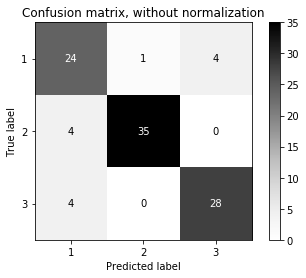

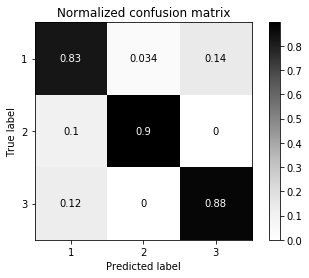

In [18]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix1d = plot_confusion_matrix(tree_4, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix1d.ax_.set_title(title)

plt.show()

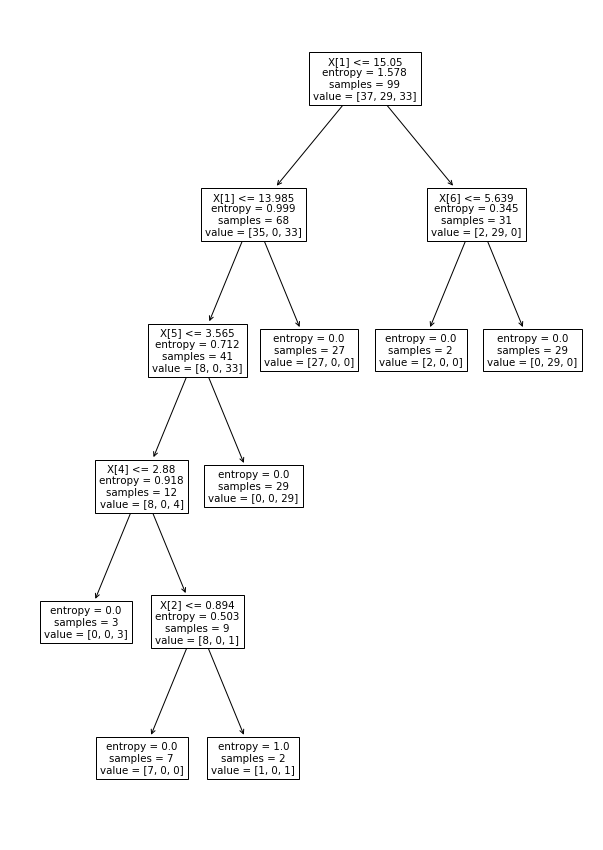

In [19]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_4)

## Second experiment

### Cross Validation dari data training dan testing
Pada bagian ini, dilakukan validasi ulang data dengan menukar nilai data training dan testing yang digunakan dan fitting ulang ke tree model yang menggunakan hyperparameter yang telah diujikan sebelumnya untuk memvalidasi dan membandingkan akurasi model apabila diberikan data baru untuk testing.

In [20]:
#swap training data and the testing data

X_train2 = X_test
X_test2 = X_train
y_train2 = y_test
y_test2 = y_train

In [21]:
# Train Decision Tree Classifer
tree_1.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_1r = tree_1.predict(X_test2)

acc2a = accuracy_score(y_true = y_test2, y_pred = y_pred_1r)

print('Accuracy score training data default parameter (return 1): ', accuracy_score(y_true = y_train, y_pred = tree_1.predict(X_train)))
print('Accuracy score test data dengan default parameter : ', acc2a)

Accuracy score training data default parameter (return 1):  0.8686868686868687
Accuracy score test data dengan default parameter :  0.8686868686868687


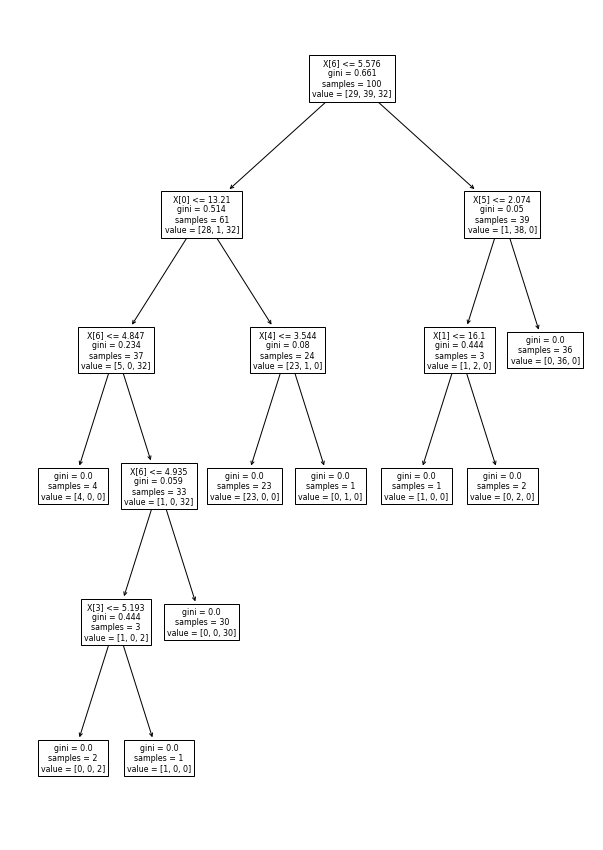

In [22]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_1)

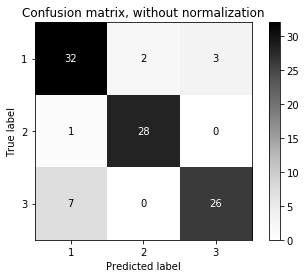

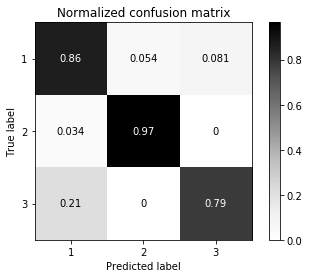

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix2a = plot_confusion_matrix(tree_1, X_test2, y_test2,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix2a.ax_.set_title(title)

plt.show()

### Hyperparameters found using GridSearchCV

In [24]:
# Train Decision Tree Classifer
tree_2.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_2r = tree_2.predict(X_test2)

acc2b = accuracy_score(y_true = y_test2, y_pred = y_pred_2r)

print("Accuracy score test data : ", acc2b)

Accuracy score test data :  0.8787878787878788


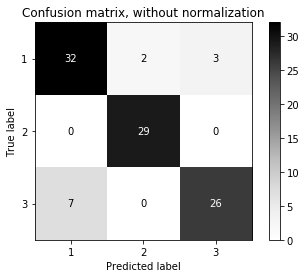

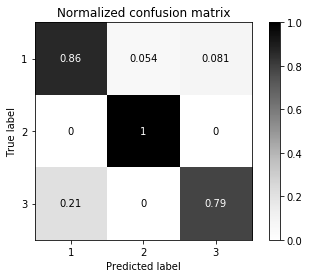

In [25]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix2b = plot_confusion_matrix(tree_2, X_test2, y_test2,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix2b.ax_.set_title(title)

plt.show()

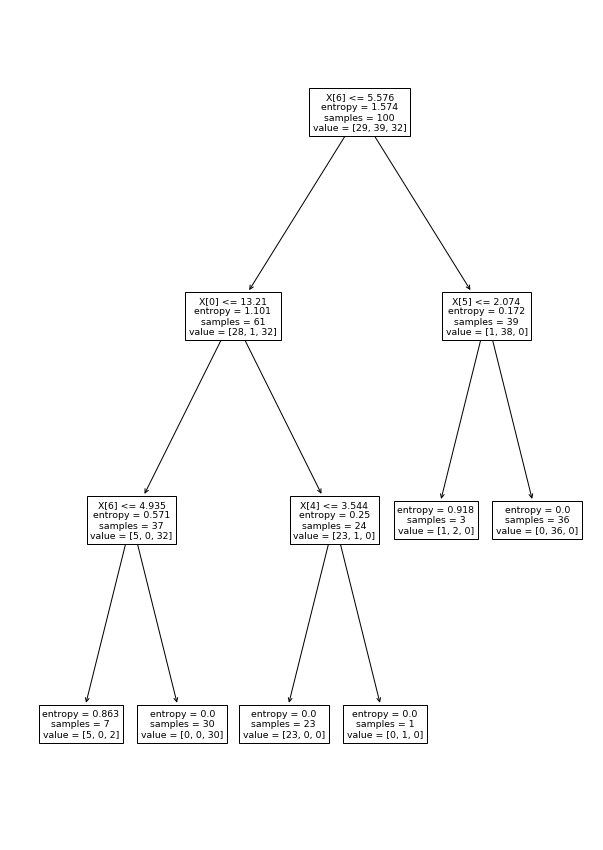

In [26]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_2)

### Hyperparameters found using Randomizedsearch CV

In [27]:
# Train Decision Tree Classifer
tree_3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_3r = tree_3.predict(X_test2)

acc2c = accuracy_score(y_true = y_test2, y_pred = y_pred_3r)

print('Accuracy score test data : ', acc2c)

Accuracy score test data :  0.898989898989899


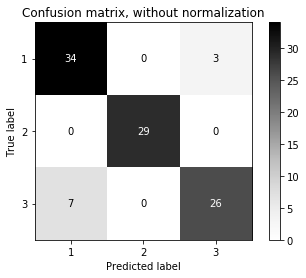

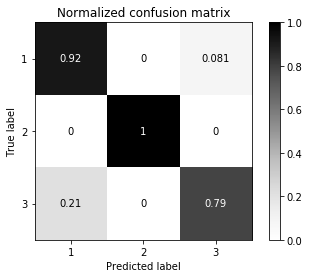

In [28]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix2c = plot_confusion_matrix(tree_3, X_test2, y_test2,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix2c.ax_.set_title(title)

plt.show()

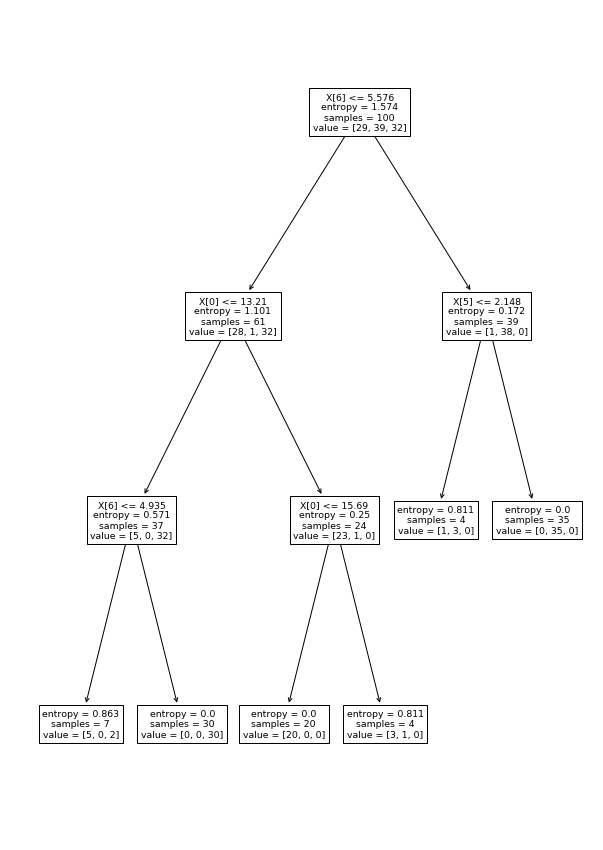

In [29]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_3)

### Manual Hyperparameter - 2

In [30]:
# Train Decision Tree Classifer
tree_4.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_4r = tree_4.predict(X_test)

acc2d = accuracy_score(y_true = y_test, y_pred = y_pred_4r)
print('Accuracy score test data (dengan default criterions gini) : ', acc2d)

Accuracy score test data (dengan default criterions gini) :  0.92


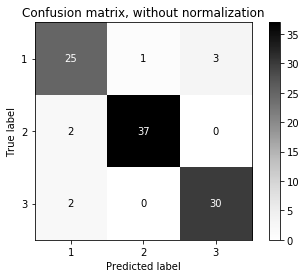

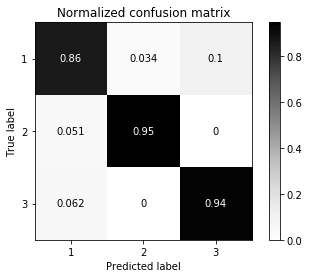

In [31]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = [1, 2, 3]

for title, normalize in titles_options:
    matrix2d = plot_confusion_matrix(tree_4, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greys,
                                     normalize=normalize)
    matrix2d.ax_.set_title(title)

plt.show()

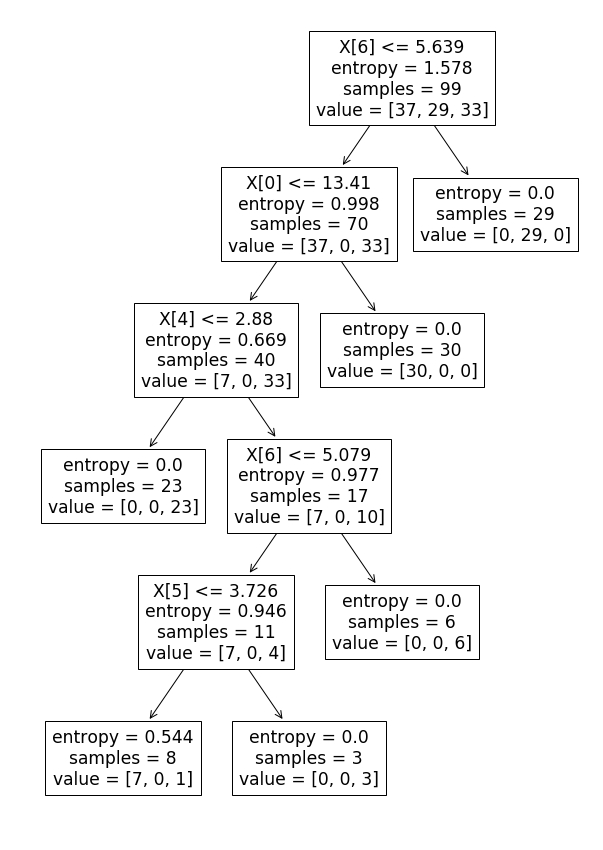

In [32]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_4)

## Summary of Results
Hasil dari percobaan berisi plotting bar chart untuk akurasi per kelas pada percobaan 1 dan 2 serta perbandingan akurasi model ketika diberikan data baru (data training dan testing ditukar)

### Plot Bar Akurasi per Kelas

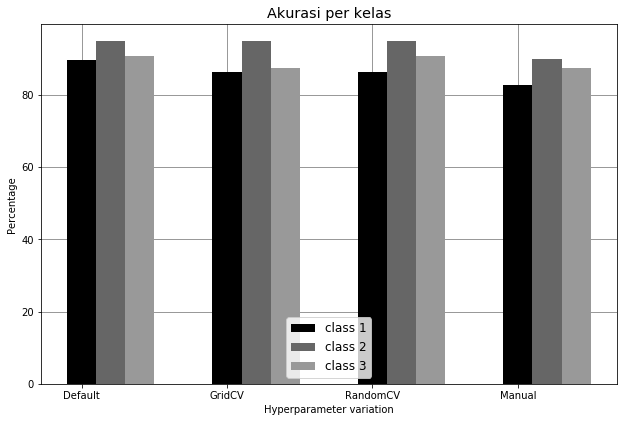

In [33]:
# add the accuracy data from confusion matrix
data1a = [matrix1a.confusion_matrix[0][0] * 100,
          matrix1b.confusion_matrix[0][0] * 100, 
          matrix1c.confusion_matrix[0][0] * 100,
          matrix1d.confusion_matrix[0][0] * 100]

data2a = [matrix1a.confusion_matrix[1][1] * 100,
          matrix1b.confusion_matrix[1][1] * 100, 
          matrix1c.confusion_matrix[1][1] * 100, 
          matrix1d.confusion_matrix[1][1] * 100]

data3a = [matrix1a.confusion_matrix[2][2] * 100,
          matrix1b.confusion_matrix[2][2] * 100, 
          matrix1c.confusion_matrix[2][2] * 100, 
          matrix1d.confusion_matrix[2][2] * 100]

# setup bar plot
width = 0.2
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder=0, color='gray')
plt.rcParams.update({'font.size': 12})

# Show data in plots
ax.bar(np.arange(len(data1a)), data1a, width=width, zorder=3)
ax.bar(np.arange(len(data2a))+ width, data2a, width=width, zorder=3)
ax.bar(np.arange(len(data3a))+ 2*width, data3a, width=width, zorder=3)

# add axis labels
xLabel = ['Default', 'GridCV', 'RandomCV', 'Manual']
ax.legend(labels=['class 1', 'class 2', 'class 3'])

plt.xticks(np.arange(len(data1a)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas')

plt.show()

### Plot akurasi per kelas setelah swap train - test

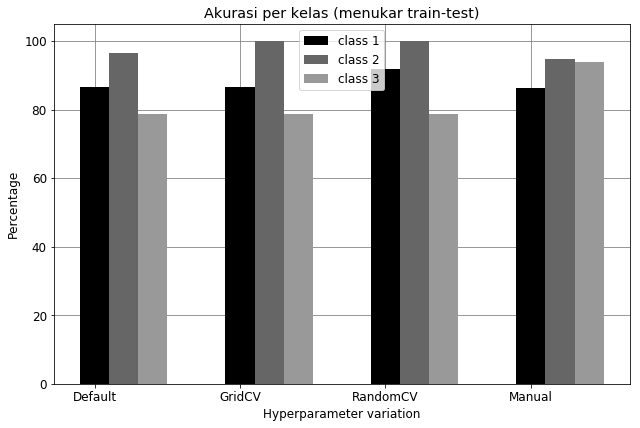

In [34]:
# add accuracy data from confusion matrix
data1b = [matrix2a.confusion_matrix[0][0] * 100,
          matrix2b.confusion_matrix[0][0] * 100, 
          matrix2c.confusion_matrix[0][0] * 100,
          matrix2d.confusion_matrix[0][0] * 100]
  
data2b = [matrix2a.confusion_matrix[1][1] * 100,
          matrix2b.confusion_matrix[1][1] * 100, 
          matrix2c.confusion_matrix[1][1] * 100, 
          matrix2d.confusion_matrix[1][1] * 100]

data3b = [matrix2a.confusion_matrix[2][2] * 100,
          matrix2b.confusion_matrix[2][2] * 100, 
          matrix2c.confusion_matrix[2][2] * 100, 
          matrix2d.confusion_matrix[2][2] * 100]

# setup bar plot
width = 0.2
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder=0, color='gray')
plt.rcParams.update({'font.size': 12})

# Show data in plots
ax.bar(np.arange(len(data1b)), data1b, width=width, zorder=3)
ax.bar(np.arange(len(data2b))+ width, data2b, width=width, zorder=3)
ax.bar(np.arange(len(data3b))+ 2*width, data3b, width=width, zorder=3)

# add axis labels
xLabel = ['Default', 'GridCV', 'RandomCV', 'Manual']

ax.legend(labels=['class 1', 'class 2', 'class 3'])
plt.xticks(np.arange(len(data1b)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas (menukar train-test)')

plt.show()

### Grafik Akurasi Model

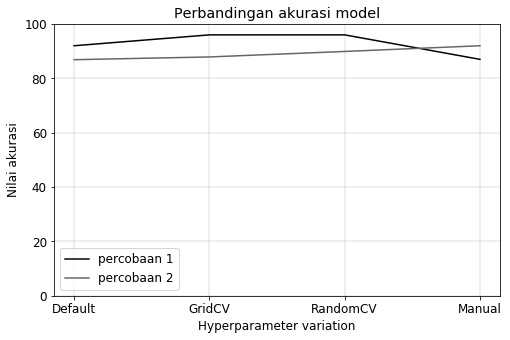

In [39]:
fig = plt.figure(figsize= (8,5))

# memasukkan data akurasi 
x_line1 = ['Default', 'GridCV', 'RandomCV', 'Manual']
y_line1 = [acc1a * 100, acc1b * 100, acc1c * 100, acc1d * 100]


# memasukkan data akurasi setelah ditukar 
x_line2 = ['Default', 'GridCV', 'RandomCV', 'Manual']
y_line2 = [acc2a * 100, acc2b * 100, acc2c * 100, acc2d * 100]

plt.ylim(bottom=0, top=100)
  
plt.xlabel("Hyperparameter variation")
plt.ylabel("Nilai akurasi")
plt.title('Perbandingan akurasi model')

ax = plt.subplot(111)
ax.plot(x_line1, y_line1, label='percobaan 1')
ax.plot(x_line1, y_line2, label='percobaan 2')

ax = plt.subplot(111)
plt.grid(color='grey', linewidth=0.25)
ax.legend()
plt.show()

### Grafik Akurasi per Kelas (rata-rata)

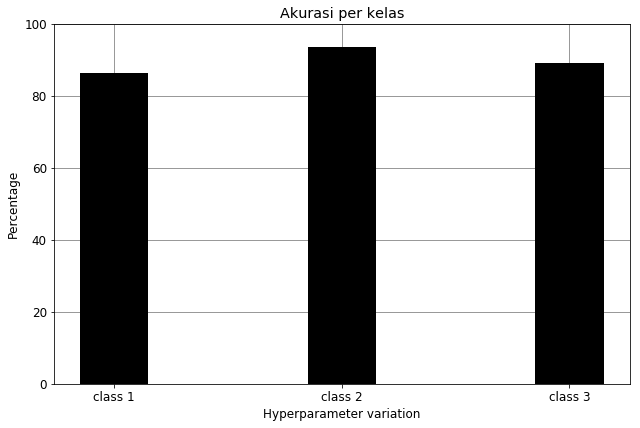

Hasil akurasi akhir model decision tree untuk biji gandum class 1 : 86.21 , class 2 : 93.59, class 3 : 89.06


In [36]:
from statistics import mean

data1_final = mean(data1a)
data2_final = mean(data2a)
data3_final = mean(data3a)

result = [data1_final, data2_final, data3_final]

# setup bar plot
width = 0.3
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder=0, color='gray')
plt.rcParams.update({'font.size': 12})

# Show data in plots
ax.bar(np.arange(len(result)), result, width=width, zorder=3)

# add axis labels
xLabel = ['class 1', 'class 2', 'class 3']

plt.xticks(np.arange(len(result)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas')
plt.ylim(bottom=0, top=100)

plt.show()

print('Hasil akurasi akhir model decision tree untuk biji gandum class 1 : %.2f , class 2 : %.2f, class 3 : %.2f' % (data1_final, data2_final, data3_final))

### Exporting results

In [44]:
X = data[['Area', 'Perimeter', 'Compactness','Kernel.Length','Kernel.Width','Asymmetry.Coeff','Kernel.Groove']]
df['Type'] = tree_2.predict(X)
print(df)
df.to_csv('DecisionTree-Out.csv')

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
5    14.38      14.21       0.8951          5.386         3.312   
6    14.69      14.49       0.8799          5.563         3.259   
7    16.63      15.46       0.8747          6.053         3.465   
8    16.44      15.25       0.8880          5.884         3.505   
9    15.26      14.85       0.8696          5.714         3.242   
10   14.03      14.16       0.8796          5.438         3.201   
11   13.89      14.02       0.8880          5.439         3.199   
12   13.78      14.06       0.8759          5.479         3.156   
13   13.74      14.05       0.8744          5.482         3.11